<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 68ms/step
The predicted class index is 3.


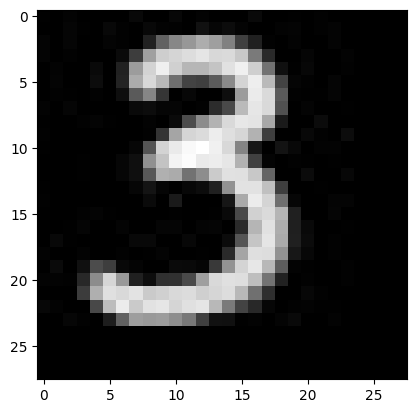

In [50]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import load_model
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image

# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

# def normalize_img(image, label):
#   return tf.cast(image, tf.float32) / 255., label

# ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(10)
# ])
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# )

# model.fit(
#     ds_train,
#     epochs=6,
#     validation_data=ds_test,
# )

# model.save('model.h5')

model = load_model('model.h5')

example = '3.jpg' # 28 x 28 pixels 

test_image = load_img(example, color_mode='grayscale', target_size=(28, 28))
test_image = img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)
class_index = np.argmax(prediction)

with Image.open(example) as img:
     img.load()
plt.imshow(img)

print(f"The predicted class index is {class_index}.")